# ENVIRONMENT

In [1]:
import os
import acquire
import prepare

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# conda install -c glemaitre imbalanced-learn
from imblearn.ensemble import BalancedBaggingClassifier

# to explode the DataFrames and avoid truncation
# pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# ACQUISITION

In [2]:
df1 = acquire.read_data('data01.csv')
df2 = acquire.read_data('data02.csv')
df3 = acquire.read_data('data03.csv')
df4 = acquire.read_data('data04.csv')
df5 = acquire.read_data('data05.csv')
df7 = acquire.read_data('data07.csv')

In [3]:
# Specify columns to take from dataframes 1, 2, 3, 4, 5, and 7:


one_cols = ['CASEID',
            'ABUSED',
            'SCRSTATR',
            'LENGTHC1',
            'C1SITUAT',
            'PABUSE',
             ]


two_cols = ['CASEID',
            'D3RCHILT',
           ]

three_cols = ['CASEID',
              'E13PRGNT',
              'N7PREGNT',
              'TOTSUPRT'
             ]

four_cols = ['CASEID',
             'G1NUMBER', 
             'H1JEALUS', 
             'H2LIMIT',
             'H3KNOWNG',
             'J1HIT',
             'J2THROWN',
             'J3PUSH',
             'J4SLAP',
             'J5KICK',
             'J6OBJECT',
             'J7BEAT',
             'J8CHOKE',
             'J9KNIFE',
             'J10GUN',
             'J11SEX',
             'POWER',
             'HARASS',
            ]

five_cols = ['CASEID', 
             'B1AGE',
             'AGEDISP',
             'STDETAI',
            ]

seven_cols = ['CASEID',
              'SAMESEXR',
              'N11DRUGS',
              'N12ALCHL',
              'N13SUHIM',
              'N16CHILD',
              'N17ARRST',
              'N1FRQNCY',
              'N2SVRITY',
              'N3WEAPON',
              'N4CHOKE',
              'N5SEX',
              'N6CONTRL',
              'N8JEALUS',
              'N10CPBLE',
             ]

In [4]:
# drop dataframes down to desired features
df1 = df1[one_cols]
df2 = df2[two_cols]
df3 = df3[three_cols]
df4 = df4[four_cols]
df5 = df5[five_cols]
df7 = df7[seven_cols]

In [5]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df7.shape)

(705, 6)
(705, 2)
(705, 4)
(705, 18)
(705, 4)
(705, 15)


In [6]:
dfa = df1.merge(right=df2, on='CASEID')
dfa = dfa.merge(right=df3, on='CASEID')
dfa = dfa.merge(right=df4, on='CASEID')
dfa = dfa.merge(right=df5, on='CASEID')
dfa = dfa.merge(right=df7, on='CASEID')

In [7]:
dfa.shape

(705, 44)

## _'dfa' : this is the dataframe with the NAW (Not Abused Woman) & AW (Abused Woman) cases._

In [8]:
df6 = acquire.read_data('data06.csv')
# df8 = acquire.read_data('data08.csv') # NO USEFUL COLUMNS
df11 = acquire.read_data('data11.csv')
# df12 = acquire.read_data('data12.csv') # NO USEFUL COLUMNS

In [9]:
print(df6.head())
# print(df8.head())
print(df11.head())
# print(df12.head())

   CASEID  INVIEWN  ABUSED  SAMESEXR  RACER  M4GUN  M5FIRED  M6MSCRRG  \
0  108395        1       1      9999      1      2     9999         2   
1  108397        1       1      9999      9      2     9999         2   
2  108399        1       1      9999      1      2     9999         2   
3  108443        1       1      9999      1      2     9999         2   
4  108444        1       1      9999      1      2     9999         2   

   M7TIEDUP  M8PRSNT    ...     M40CNSL3  M40CNSL4  M44ADV1  M44ADV2  M44ADV3  \
0         2        2    ...         9999      9999        1     9999     9999   
1         2        1    ...         9999      9999        1     9999     9999   
2         1        1    ...         9999      9999        2        1     9999   
3         2        1    ...         9999      9999       26     9999     9999   
4         2        1    ...         9999      9999        1     9999     9999   

   M22NOINJ  M22NONED  M22PRIV  M22EMBAR  HELPTYPE  
0         1         0

In [10]:
# Specify columns to take from dataframes 6 and 11:


six_cols = ['CASEID',
            'M5FIRED',
            'M11HIGH',
            'M35SAFE',
            'M41ILLGL',
            'M42DAGRR',
            'M13TALKR',
            'M32OTHER',
            'M27HOW',
            'M30ARRES',
            'M31HOW',
            'M38ORDER',
           ]

eleven_cols = ['CASEID',
               'SEVERER',
               'TOTINCR',
               'THREATR',
               'SLAPR',
               'PUNCHR',
               'BEATR',
               'UWEAPON',
               'FORCEDR',
               'MISCARR',
               'RESTRAIN',
               'CHOKED',
               'NDRUNK',
               'RDRUNK',
               'BOTHDRUN',
               'NDRUGS',
               'RDRUGS',
               'BOTHDRUG',
              ]

In [11]:
# drop dataframes down to desired features
df6 = df6[six_cols]
df11 = df11[eleven_cols]

In [12]:
print(df6.shape)
print(df11.shape)

(497, 12)
(497, 18)


In [13]:
dfb = df6.merge(right=df11, on='CASEID')

## _'dfb' : this is the dataframe with the AW (Abused Woman) cases_

In [14]:
# df9 & 10 are cases of AW (Abused Woman)
df9 = acquire.read_data('data09.csv')
df10 = acquire.read_data('data10.csv')

# df 13, 14 & 15 are cases of HOMICIDE
df13 = acquire.read_data('data13.csv')
df14 = acquire.read_data('data14.csv')
df15 = acquire.read_data('data15.csv')

# PREPARATION

## _Examining the dataframes, dfa & dfb, for any missing or inconsistent values._

In [15]:
dfa

,CASEID,ABUSED,SCRSTATR,LENGTHC1,C1SITUAT,PABUSE,D3RCHILT,E13PRGNT,N7PREGNT,TOTSUPRT,...,N16CHILD,N17ARRST,N1FRQNCY,N2SVRITY,N3WEAPON,N4CHOKE,N5SEX,N6CONTRL,N8JEALUS,N10CPBLE
0,108395,1,1,1,1,1,1,3,2,9,...,2,2,2,2,2,2,2,2,2,2
1,108397,1,1,2,1,1,0,3,3,11,...,2,1,2,1,1,1,1,2,1,1
2,108399,1,1,5,1,1,6,3,2,9,...,2,2,2,2,2,1,2,2,2,2
3,108443,1,1,2,1,1,0,1,2,12,...,2,1,2,2,1,1,2,1,2,2
4,108444,1,1,2,1,1,1,2,2,11,...,2,1,1,1,2,2,2,2,2,2
5,108456,1,1,2,3,1,1,3,2,2,...,2,1,2,2,2,1,1,2,1,1
6,108460,1,1,3,1,1,1,888,1,10,...,2,2,2,2,2,2,2,2,1,1
7,108525,1,1,4,4,3,2,3,2,11,...,2,1,1,1,1,1,1,1,1,1
8,108562,1,1,5,1,1,3,3,2,11,...,1,2,2,2,1,2,2,1,1,1
9,109304,2,3,5,9,9,0,3,9,12,...,2,2,3,3,3,3,3,3,3,3


In [16]:
dfb

,CASEID,M5FIRED,M11HIGH,M35SAFE,M41ILLGL,M42DAGRR,M13TALKR,M32OTHER,M27HOW,M30ARRES,...,FORCEDR,MISCARR,RESTRAIN,CHOKED,NDRUNK,RDRUNK,BOTHDRUN,NDRUGS,RDRUGS,BOTHDRUG
0,108395,9999,2,1,2,0,1,99,99999,3,...,0,0,0,0,0,0,0,0,0,0
1,108397,9999,2,1,2,0,1,99,99999,3,...,0,0,0,1,2,0,0,0,0,0
2,108399,9999,2,1,2,0,1,99,99999,3,...,0,0,1,1,0,0,0,0,0,0
3,108443,9999,2,1,2,0,1,13,99999,3,...,0,0,0,1,1,0,0,0,0,0
4,108444,9999,1,1,2,0,1,99,99999,3,...,0,0,0,0,3,0,0,0,0,0
5,108456,9999,1,1,2,1,1,11,11,0,...,0,0,0,0,0,0,0,0,0,0
6,108460,9999,2,1,2,0,1,11,99999,3,...,0,0,0,0,0,0,0,0,0,0
7,108525,1,2,1,1,1,1,41,21,1,...,0,0,0,0,0,0,0,0,0,0
8,108562,9999,1,1,2,0,1,99,99999,3,...,0,0,0,0,2,0,0,0,0,0
9,118051,9999,999,999,999,999,999,99,99999,999,...,0,0,0,0,0,0,0,0,0,0


In [17]:
def missing_values_col(df):
    """
    Thids function returns the total missing values
    and the percent missing values by column.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    return pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})


def missing_values_row(df):
    """
    Write or use a previously written function to return the
    total missing values and the percent missing values by row.
    """
    null_count = df.isnull().sum(axis=1)
    null_percentage = (null_count / df.shape[1]) * 100
    return pd.DataFrame({'num_missing': null_count, 'percentage': null_percentage})


def handle_missing_threshold(df, prop_required_column = .3, prop_required_row = .9):
    """
    Removes columns and rows whose count of missing values exceeds threshold.
    """
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df


def summarize_data(df):
    
    df_head = df.head()
    print(f'HEAD\n{df_head}', end='\n\n')
   
    df_tail = df.tail()
    print(f'TAIL\n{df_tail}', end='\n\n')

    shape_tuple = df.shape
    print(f'SHAPE: {shape_tuple}', end='\n\n')
    
    df_describe = df.describe()
    print(f'DESCRIPTION\n{df_describe}', end='\n\n')
    
    df.info()
    print(f'INFORMATION')    

    print(f'VALUE COUNTS', end='\n\n')
    for col in df.columns:
        n = df[col].unique().shape[0]
        col_bins = min(n, 10)
        print(f'{col}:')
        if df[col].dtype in ['int64', 'float64'] and n > 10:
            print(df[col].value_counts(bins=col_bins, sort=False, dropna=False))
        else:
            print(df[col].value_counts(dropna=False))
        print('\n')


def plot_hist(df):
    """
    Plots the distribution of the dataframe's variables.
    """
    df.hist(figsize=(24, 20), bins=20)

In [18]:
missing_values_col(dfa)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
CASEID,0,0.0,0,0.0,0,0.0
ABUSED,0,0.0,0,0.0,0,0.0
SCRSTATR,0,0.0,0,0.0,0,0.0
LENGTHC1,0,0.0,0,0.0,0,0.0
C1SITUAT,0,0.0,0,0.0,0,0.0
PABUSE,0,0.0,0,0.0,0,0.0
D3RCHILT,0,0.0,0,0.0,0,0.0
E13PRGNT,0,0.0,0,0.0,0,0.0
N7PREGNT,0,0.0,0,0.0,0,0.0
TOTSUPRT,0,0.0,0,0.0,0,0.0


In [19]:
missing_values_col(dfb)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
CASEID,0,0.0,0,0.0,0,0.0
M5FIRED,0,0.0,0,0.0,0,0.0
M11HIGH,0,0.0,0,0.0,0,0.0
M35SAFE,0,0.0,0,0.0,0,0.0
M41ILLGL,0,0.0,0,0.0,0,0.0
M42DAGRR,0,0.0,0,0.0,0,0.0
M13TALKR,0,0.0,0,0.0,0,0.0
M32OTHER,0,0.0,0,0.0,0,0.0
M27HOW,0,0.0,0,0.0,0,0.0
M30ARRES,0,0.0,0,0.0,0,0.0


In [20]:
missing_values_row(dfa)

,num_missing,percentage
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,0,0.0


In [21]:
missing_values_row(dfb)

,num_missing,percentage
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,0,0.0


In [22]:
summarize_data(dfa)

HEAD
   CASEID  ABUSED  SCRSTATR  LENGTHC1  C1SITUAT  PABUSE  D3RCHILT  E13PRGNT  \
0  108395       1         1         1         1       1         1         3   
1  108397       1         1         2         1       1         0         3   
2  108399       1         1         5         1       1         6         3   
3  108443       1         1         2         1       1         0         1   
4  108444       1         1         2         1       1         1         2   

   N7PREGNT  TOTSUPRT    ...     N16CHILD  N17ARRST  N1FRQNCY  N2SVRITY  \
0         2         9    ...            2         2         2         2   
1         3        11    ...            2         1         2         1   
2         2         9    ...            2         2         2         2   
3         2        12    ...            2         1         2         2   
4         2        11    ...            2         1         1         1   

   N3WEAPON  N4CHOKE  N5SEX  N6CONTRL  N8JEALUS  N10CPBLE  
0        

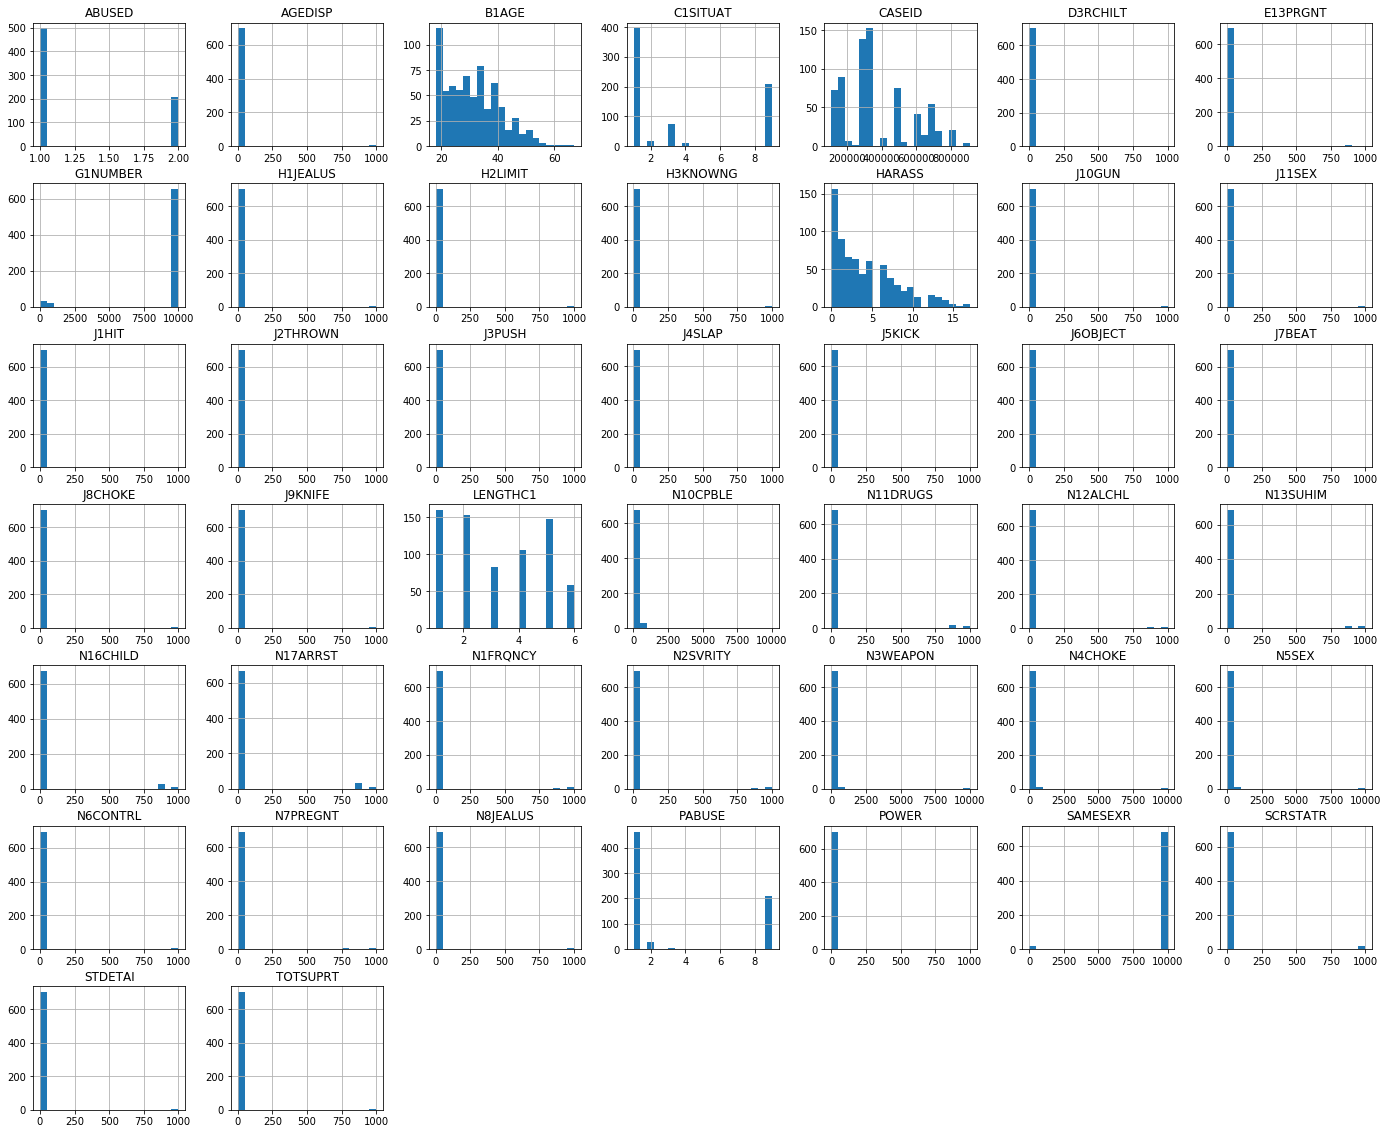

In [23]:
plot_hist(dfa)

In [24]:
summarize_data(dfb)

HEAD
   CASEID  M5FIRED  M11HIGH  M35SAFE  M41ILLGL  M42DAGRR  M13TALKR  M32OTHER  \
0  108395     9999        2        1         2         0         1        99   
1  108397     9999        2        1         2         0         1        99   
2  108399     9999        2        1         2         0         1        99   
3  108443     9999        2        1         2         0         1        13   
4  108444     9999        1        1         2         0         1        99   

   M27HOW  M30ARRES    ...     FORCEDR  MISCARR  RESTRAIN  CHOKED  NDRUNK  \
0   99999         3    ...           0        0         0       0       0   
1   99999         3    ...           0        0         0       1       2   
2   99999         3    ...           0        0         1       1       0   
3   99999         3    ...           0        0         0       1       1   
4   99999         3    ...           0        0         0       0       3   

   RDRUNK  BOTHDRUN  NDRUGS  RDRUGS  BOTHDRUG  
0  

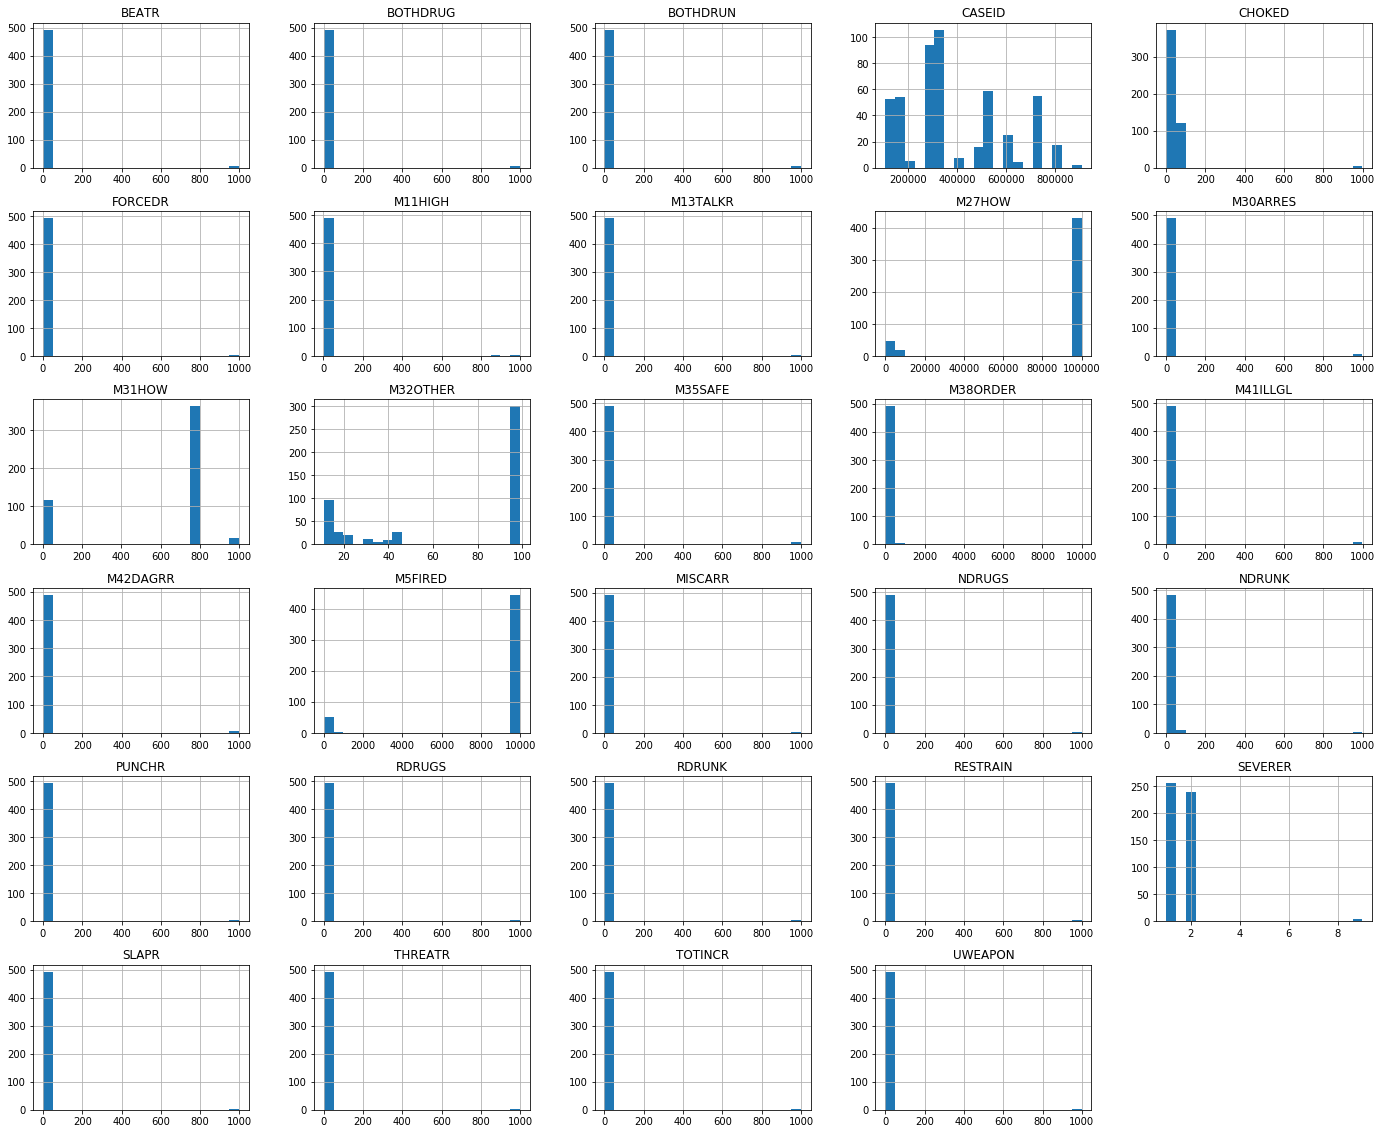

In [25]:
plot_hist(dfb)

## _Examine dfa in more detail. Take information from df10 and create a column that shows which cases had repeat offenses._

In [26]:
def make_repeat_series(df10):
    '''takes a dataframe with a caseid columns and returns a series with offense numbers using a groupby'''
    repeat_series = df10.groupby('CASEID').INCIDENT.count()
    return repeat_series

def over_1(repeat_series):
    '''takes a pandas series and tests for a value to put in a list of caseIDs that are repeat offenses'''
    repeat_cases = []
    for case, inc_num in enumerate(repeat_series):
        if inc_num > 1:
            repeat_cases.append(repeat_series.index[case])
    return repeat_cases

def get_repeat_case(val):
    '''takes a value and establishes if it meets criteria to be in repeat offenses'''
    repeat_cases = over_1(make_repeat_series(df10))
    if val in repeat_cases:
        return 1
    else:
        return 0

dfa['RECID'] = dfb.CASEID.apply(get_repeat_case)

In [27]:
dfa.head().T

,0,1,2,3,4
CASEID,108395.0,108397.0,108399.0,108443.0,108444.0
ABUSED,1.0,1.0,1.0,1.0,1.0
SCRSTATR,1.0,1.0,1.0,1.0,1.0
LENGTHC1,1.0,2.0,5.0,2.0,2.0
C1SITUAT,1.0,1.0,1.0,1.0,1.0
PABUSE,1.0,1.0,1.0,1.0,1.0
D3RCHILT,1.0,0.0,6.0,0.0,1.0
E13PRGNT,3.0,3.0,3.0,1.0,2.0
N7PREGNT,2.0,3.0,2.0,2.0,2.0
TOTSUPRT,9.0,11.0,9.0,12.0,11.0


## _This new column, RECID, is a boolean value that tells us whether the cases were re-assault cases or not._

In [28]:
# look at unaltered value counts
prepare.value_counts(dfa)

CASEID

-------------------------------------------------------------

ABUSED
1    497
2    208
Name: ABUSED, dtype: int64

-------------------------------------------------------------

SCRSTATR
1      455
2      118
3      115
999     17
Name: SCRSTATR, dtype: int64

-------------------------------------------------------------

LENGTHC1
1    159
2    153
3     83
4    105
5    147
6     58
Name: LENGTHC1, dtype: int64

-------------------------------------------------------------

C1SITUAT
1    395
2     18
3     74
4     10
9    208
Name: C1SITUAT, dtype: int64

-------------------------------------------------------------

PABUSE
1    464
2     27
3      6
9    208
Name: PABUSE, dtype: int64

-------------------------------------------------------------

D3RCHILT
0      339
1      136
2      113
3       57
4       32
5        9
6        9
7        5
12       1
555      1
666      1
999      2
Name: D3RCHILT, dtype: int64

-----------------------------------------------------------

In [29]:
# change dfa to df to match conventions of prepare.py
df = dfa
#use prepare function to rename features 
prepare.rename_columns(df)
dfa = df

In [30]:
# ensure renaming of features worked
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 45 columns):
id                              705 non-null int64
abuse_past_year                 705 non-null int64
abuse_status                    705 non-null int64
length_relationship             705 non-null int64
partner_abusive                 705 non-null int64
num_abusers                     705 non-null int64
num_children                    705 non-null int64
pregnant                        705 non-null int64
beaten_while_pregnant           705 non-null int64
support_score                   705 non-null int64
guns_in_home                    705 non-null int64
jealous_past_year               705 non-null int64
limit_family_contact            705 non-null int64
location_tracking               705 non-null int64
threat_hit                      705 non-null int64
thrown_object                   705 non-null int64
push_shove                      705 non-null int64
slap                        

In [31]:
# run function to replace nonvalues and change values to conventionally boolean archetypes
prepare.replace_nonvals(dfa)

# EXPLORATION

In [32]:
dfa[dfa.reassault == 1].shape

(350, 45)

## _So now we can see the cases where reassault happened. There are 350 cases out of 705. There were 497 cases of domestic violence._

In [33]:
dfa.choked.value_counts()

0    473
1    232
Name: choked, dtype: int64

In [34]:
dfa[dfa.choked == 1].shape

(232, 45)

In [35]:
dfa.abuse_past_year.value_counts()

1    497
0    208
Name: abuse_past_year, dtype: int64

In [36]:
dfa.loc[(dfa['abuse_past_year'] >= 1) & (dfa['choked'] <= 1)].shape

(497, 45)

## _232 cases involved choking or strangulation in the past year._

In [37]:
dfa.choked_ever.value_counts()

0    430
1    275
Name: choked_ever, dtype: int64

In [38]:
dfa[dfa.choked_ever == 1].shape

(275, 45)

In [39]:
dfa.loc[(dfa['abuse_past_year'] >= 1) & (dfa['choked_ever'] <= 1)].shape

(497, 45)

## _275 cases involved choking or strangulation at least once._

In [40]:
dfa.weapon_ever.value_counts()

0    520
1    185
Name: weapon_ever, dtype: int64

In [41]:
dfa[dfa.weapon_ever == 1].shape

(185, 45)

## _185 cases involved a weapon at least once._

In [42]:
dfa.violence_increased.value_counts()

0    520
1    185
Name: violence_increased, dtype: int64

In [43]:
dfa.loc[(dfa['abuse_past_year'] >= 1) & (dfa['violence_increased'] <= 1)].shape

(497, 45)

In [44]:
dfa.severity_increased.value_counts()

0    516
1    189
Name: severity_increased, dtype: int64

In [45]:
dfa.loc[(dfa['abuse_past_year'] >= 1) & (dfa['severity_increased'] <= 1)].shape

(497, 45)

# Modeling

In [46]:
x_columns = ['length_relationship',
             'num_children',
             'pregnant',
             'support_score',
             'guns_in_home',
             'jealous_past_year',
             'limit_family_contact',
             'location_tracking',
             'power_scale',
             'id_age',
             'age_disparity',
             'children_not_partner', 
             'same_sex_relationship',
             'partner_drug_use',
             'partner_alcohol_use',
             'partner_reported_child_abuse',
             'partner_arrested',
             'controlled_ever',
             'jealous',
             'capable_murder'
            ]

z_columns = ['threat_hit',
             'controlled_ever',
             'jealous',
             'jealous_past_year',
             'location_tracking',
             'thrown_object',
             'limit_family_contact',
             'partner_drug_use',
             'partner_arrested',
             'threat_knife',
             'partner_alcohol_use',
             'support_score',
             'threat_suicide',
             'threat_gun',
             'pregnant',
             'partner_reported_child_abuse'
            ]

xx_columns = ['threat_hit',
             'controlled_ever',
             'jealous',
             'jealous_past_year',
             'location_tracking',
             'thrown_object',
             'limit_family_contact',
             'partner_drug_use',
             'partner_arrested',
            ]

xxx_columns = ['threat_hit',
             'controlled_ever',
             'jealous',
             'location_tracking',
             'thrown_object'
            ]

zz_columns = ['threat_hit',
             'controlled_ever',
             'jealous',
             'location_tracking']

X = dfa[xxx_columns]
y = dfa[['abuse_past_year']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 0, stratify=y)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

## 1. Logistic Regression w/ Cross Validation

In [47]:
clf = LogisticRegressionCV(cv=5,
                           random_state=0,
                          ).fit(X, y)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
y_pred = clf.predict(X_train)

In [49]:
y_pred_proba = clf.predict_proba(X_train)

In [50]:
y_pred_proba

array([[0.65291528, 0.34708472],
       [0.65291528, 0.34708472],
       [0.65291528, 0.34708472],
       ...,
       [0.09493448, 0.90506552],
       [0.32189968, 0.67810032],
       [0.04376103, 0.95623897]])

In [51]:
clf.score(X, y) 

0.9177304964539007

In [52]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.93


In [53]:
print(confusion_matrix(y_train, y_pred))

[[174   3]
 [ 41 381]]


In [54]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.98      0.89       177
          1       0.99      0.90      0.95       422

avg / total       0.94      0.93      0.93       599



## 2. Decision Tree

In [55]:
params = {'max_depth': [2, 3, 4],
          'max_features': [None, 1, 3]}

In [56]:
# for classificaiton you can change the algorithm as gini or entropy (information gain).  Default is gini.
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=3, random_state=0)

In [57]:
grid = GridSearchCV(dtc, params, cv=3, iid=True)

In [58]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4], 'max_features': [None, 1, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
results = grid.cv_results_
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [60]:
test_scores = results['mean_test_score']
test_scores

array([0.89315526, 0.80467446, 0.89482471, 0.92153589, 0.81469115,
       0.92153589, 0.93155259, 0.87479132, 0.93155259])

In [61]:
params = results['params']
params

[{'max_depth': 2, 'max_features': None},
 {'max_depth': 2, 'max_features': 1},
 {'max_depth': 2, 'max_features': 3},
 {'max_depth': 3, 'max_features': None},
 {'max_depth': 3, 'max_features': 1},
 {'max_depth': 3, 'max_features': 3},
 {'max_depth': 4, 'max_features': None},
 {'max_depth': 4, 'max_features': 1},
 {'max_depth': 4, 'max_features': 3}]

In [62]:
for p, s in zip(params, test_scores):
    p['score'] = s

pd.DataFrame(params).sort_values(by='score')

,max_depth,max_features,score
1,2,1.0,0.804674
4,3,1.0,0.814691
7,4,1.0,0.874791
0,2,NaN,0.893155
2,2,3.0,0.894825
3,3,NaN,0.921536
5,3,3.0,0.921536
6,4,NaN,0.931553
8,4,3.0,0.931553


In [63]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [64]:
cross_val_score(dtc, X_train, y_train, cv=5)

array([0.95041322, 0.9338843 , 0.96638655, 0.87394958, 0.93277311])

In [65]:
y_pred = dtc.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 0])

In [66]:
y_pred_proba = dtc.predict_proba(X_train)
y_pred_proba

array([[0.82075472, 0.17924528],
       [0.82075472, 0.17924528],
       [0.82075472, 0.17924528],
       ...,
       [0.        , 1.        ],
       [0.02777778, 0.97222222],
       [0.        , 1.        ]])

In [67]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.93


In [68]:
confusion_matrix(y_train, y_pred)

array([[174,   3],
       [ 38, 384]])

In [69]:
sorted(y_train.abuse_past_year.unique())

[0, 1]

In [70]:
y_train.abuse_past_year.value_counts()

1    422
0    177
Name: abuse_past_year, dtype: int64

In [71]:
labels = sorted(y_train.abuse_past_year.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,174,3
1,38,384


In [72]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.98      0.89       177
          1       0.99      0.91      0.95       422

avg / total       0.94      0.93      0.93       599



## 3. Random Forest

In [73]:
r_params = {'max_depth': [2, 3, 4]}

In [89]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='entropy',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=0)

In [90]:
r_grid = GridSearchCV(rf, r_params, cv=3, iid=True)

ValueError: Parameter values for parameter (max_depth) need to be a sequence(but not a string) or np.ndarray.

In [91]:
r_grid.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarni

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [92]:
r_results = r_grid.cv_results_
r_results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [93]:
r_test_scores = r_results['mean_test_score']
r_test_scores

array([0.92320534, 0.93155259, 0.93155259])

In [94]:
r_params = r_results['params']
r_params

[{'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}]

In [95]:
for p, s in zip(r_params, r_test_scores):
    p['score'] = s

pd.DataFrame(r_params).sort_values(by='score')

,max_depth,score
0,2,0.923205
1,3,0.931553
2,4,0.931553


In [96]:
rf.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [97]:
cross_val_score(rf, X_train, y_train, cv=5)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarni

array([0.95041322, 0.9338843 , 0.96638655, 0.87394958, 0.93277311])

In [98]:
print(rf.feature_importances_)

[0.41481658 0.21826442 0.2661288  0.02811986 0.07267033]


In [99]:
y_pred = rf.predict(X_train)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,

In [100]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.76984153, 0.23015847],
       [0.76984153, 0.23015847],
       [0.76984153, 0.23015847],
       ...,
       [0.00362857, 0.99637143],
       [0.19173326, 0.80826674],
       [0.00258471, 0.99741529]])

In [101]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.93


In [102]:
print(confusion_matrix(y_train, y_pred))

[[174   3]
 [ 38 384]]


In [103]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.98      0.89       177
          1       0.99      0.91      0.95       422

avg / total       0.94      0.93      0.93       599

